### Lista de Imports
<a name="Forma cuadrática"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import sympy as sym

### Formas Cuadráticas

<a name="Forma cuadrática"></a>

### Punto 1

Considere la función cuadrática $f(x)=x^{T}A_{i}x$ y las siguientes matrices:

$$A_{1} = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix}$$

$$A_{2} = \begin{bmatrix} -9 & 0 \\ 0 & -9 \end{bmatrix}$$

$$A_{3} = \begin{bmatrix} 1 & 5 \\ 5 & 1 \end{bmatrix}$$

$$A_{4} = \begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix}$$


a) Curvas de contorno para cada $A_{i}$

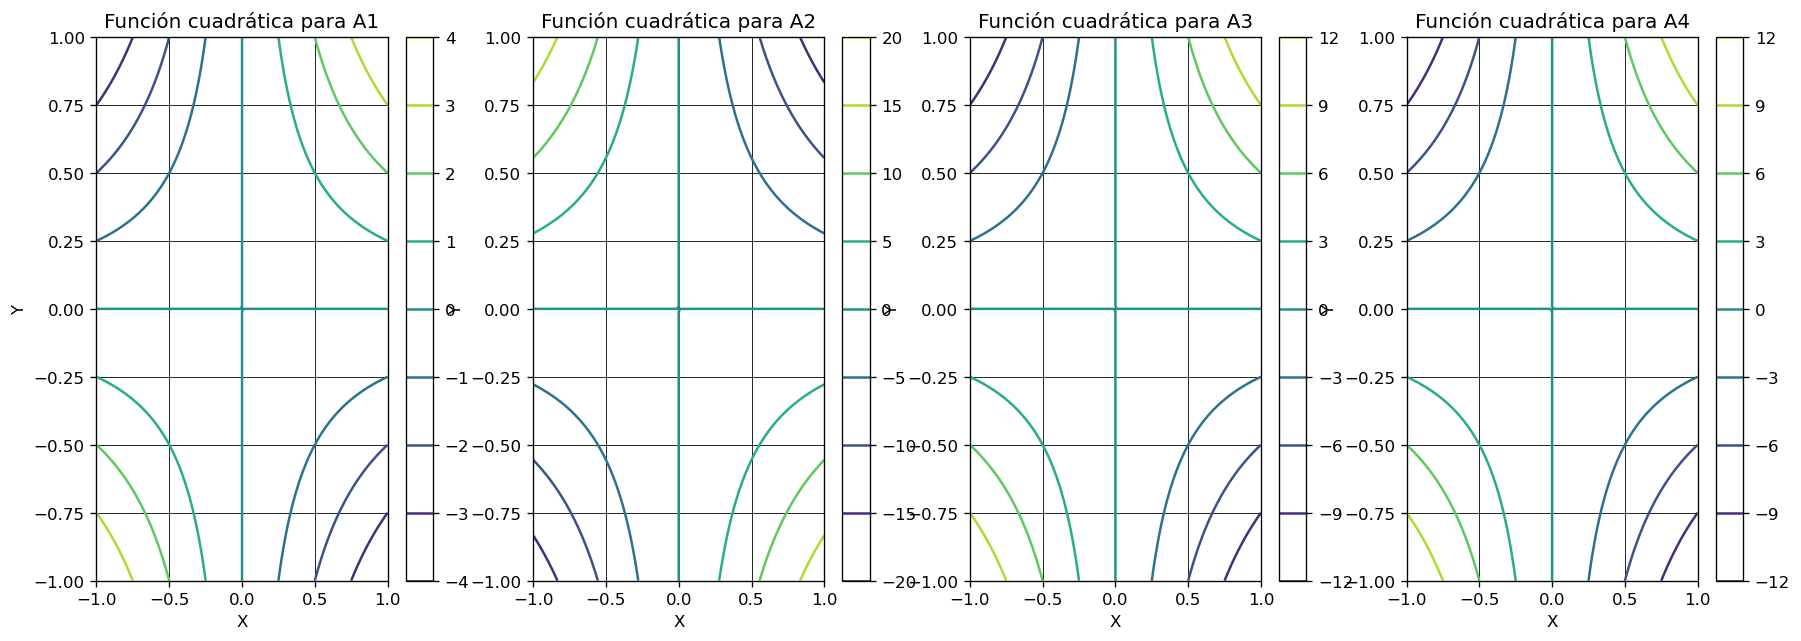

In [2]:
# Función f(x)
def cuadratic(x, A):
    t1 = np.dot(np.transpose(x), A)
    f = np.dot(t1, x)
    return f

# Dominio de análisis
xp = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xp, xp)

# Matrices de interés
A1 = np.array([[1, 0], [0, 3]])
A2 = np.array([[-9, 0], [0, -9]])
A3 = np.array([[1, 5], [5, 1]])
A4 = np.array([[5, 1], [1, 5]])
A = np.array([A1, A2, A3, A4])

# Gráficas de interés
for i in range(len(A)):
    figure(1, figsize=(18, 6), dpi=120)
    plt.subplot(1,4,i+1)
    ax = plt.contour(X, Y, cuadratic(X[0:2,:], A[i]))
    
    # Marcos de refrencia
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Función cuadrática para A' + str(i+1))
    plt.grid(color= 'black', linestyle='-', linewidth=0.5)
    plt.colorbar(ax)
    

b) Uso de la función *plot_surface* para f en rango $[-1,1]^2$ para cada matriz

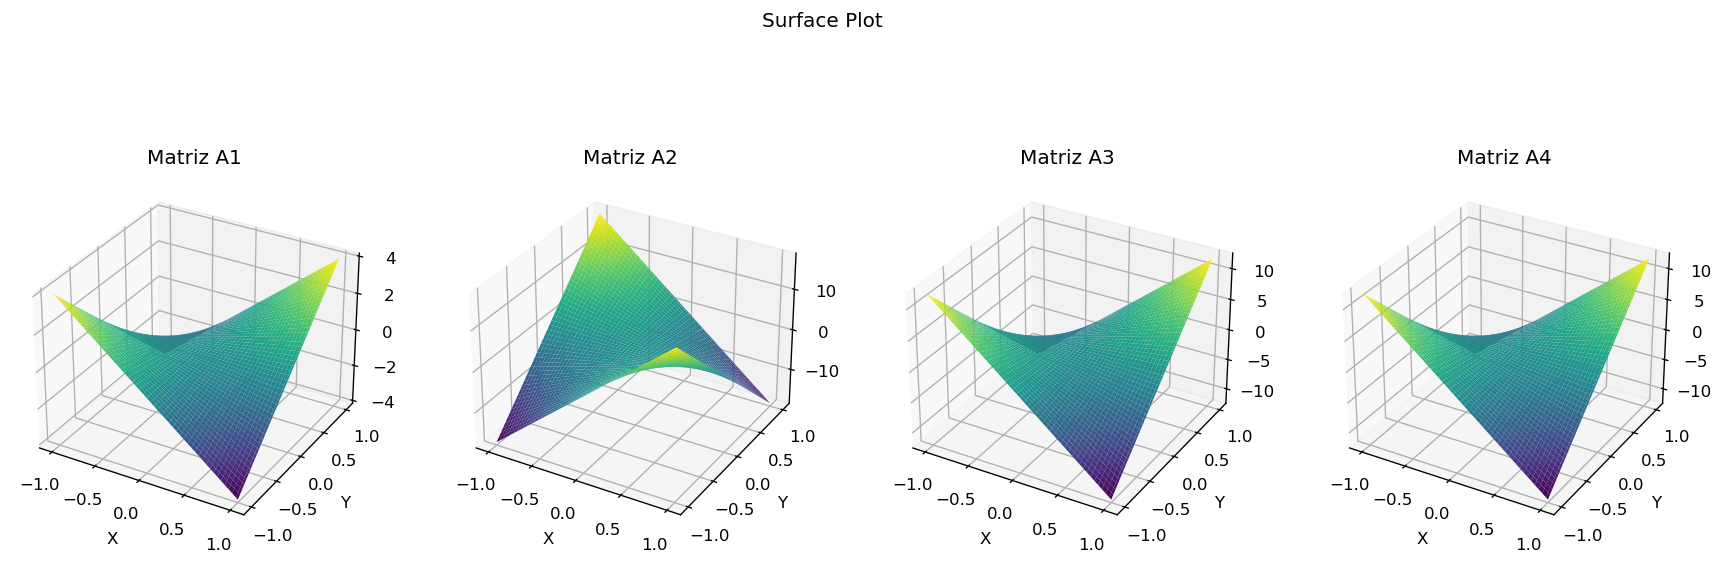

In [3]:
for i in range(len(A)):
    fig = plt.figure(1, figsize=(18, 6), dpi=120)
    fig.suptitle('Surface Plot')
    
    # Se establece como proyección 3D
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    
    # Desarrollo de la superficie
    surf = ax.plot_surface(X, Y, cuadratic(X[0:2,:], A[i]), cmap='viridis')
    
    # Marcos de refrencia
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Matriz A' + str(i+1))
    plt.grid(color= 'black', linestyle='-', linewidth=0.5)
    

c) Valores y vectores propios para $A_{1}, A_{2}, A_{3}, A_{4}$

In [4]:
val_A1, vec_A1 = np.linalg.eig(A1)
val_A2, vec_A2 = np.linalg.eig(A2)
val_A3, vec_A3 = np.linalg.eig(A3)
val_A4, vec_A4 = np.linalg.eig(A4)

val = [val_A1, val_A2, val_A3, val_A4]
vec = [vec_A1, vec_A2, vec_A3, vec_A4]

data = {"Matriz": ['A1', 'A2', 'A3', 'A4'],
       "Valores propios": np.around(val, 2).tolist(),
       "Vectores propios": np.around(vec, 2).tolist()}


df = pd.DataFrame(data)
df.head(21)

,Matriz,Valores propios,Vectores propios
0,A1,"[1.0, 3.0]","[[1.0, 0.0], [0.0, 1.0]]"
1,A2,"[-9.0, -9.0]","[[1.0, 0.0], [0.0, 1.0]]"
2,A3,"[6.0, -4.0]","[[0.71, -0.71], [0.71, 0.71]]"
3,A4,"[6.0, 4.0]","[[0.71, -0.71], [0.71, 0.71]]"


Los valores y vectores propios presentan una relación directa ya que se ajustan a las características de las curvas de contorno. Por ejemplo, cuando los valores propios poseen el mismo signo, indica que es concava hacia arriba en caso de ser positivo y concava hacia abajo en caso de ser negtivo. Además, la magnitud de los valores propios se define como una ampliación o contracción en la longitud de las curvas de análisis por aquel factor. Mientras que los vectores propios evidencian la orientación de los ejes a los que están ligados las curvas.

### Punto 2

Considere la función cuadrática $f(x)=x^{T}A_{\rho}x$ y las siguientes matrices:

$$A_{\rho} = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}$$

Considere $\rho=0, \pm 0.25, \pm 0.75, \pm 1, \pm 2$

a. Uso de la función *plot_surface* para f en rango $[-1,1]^2$ 

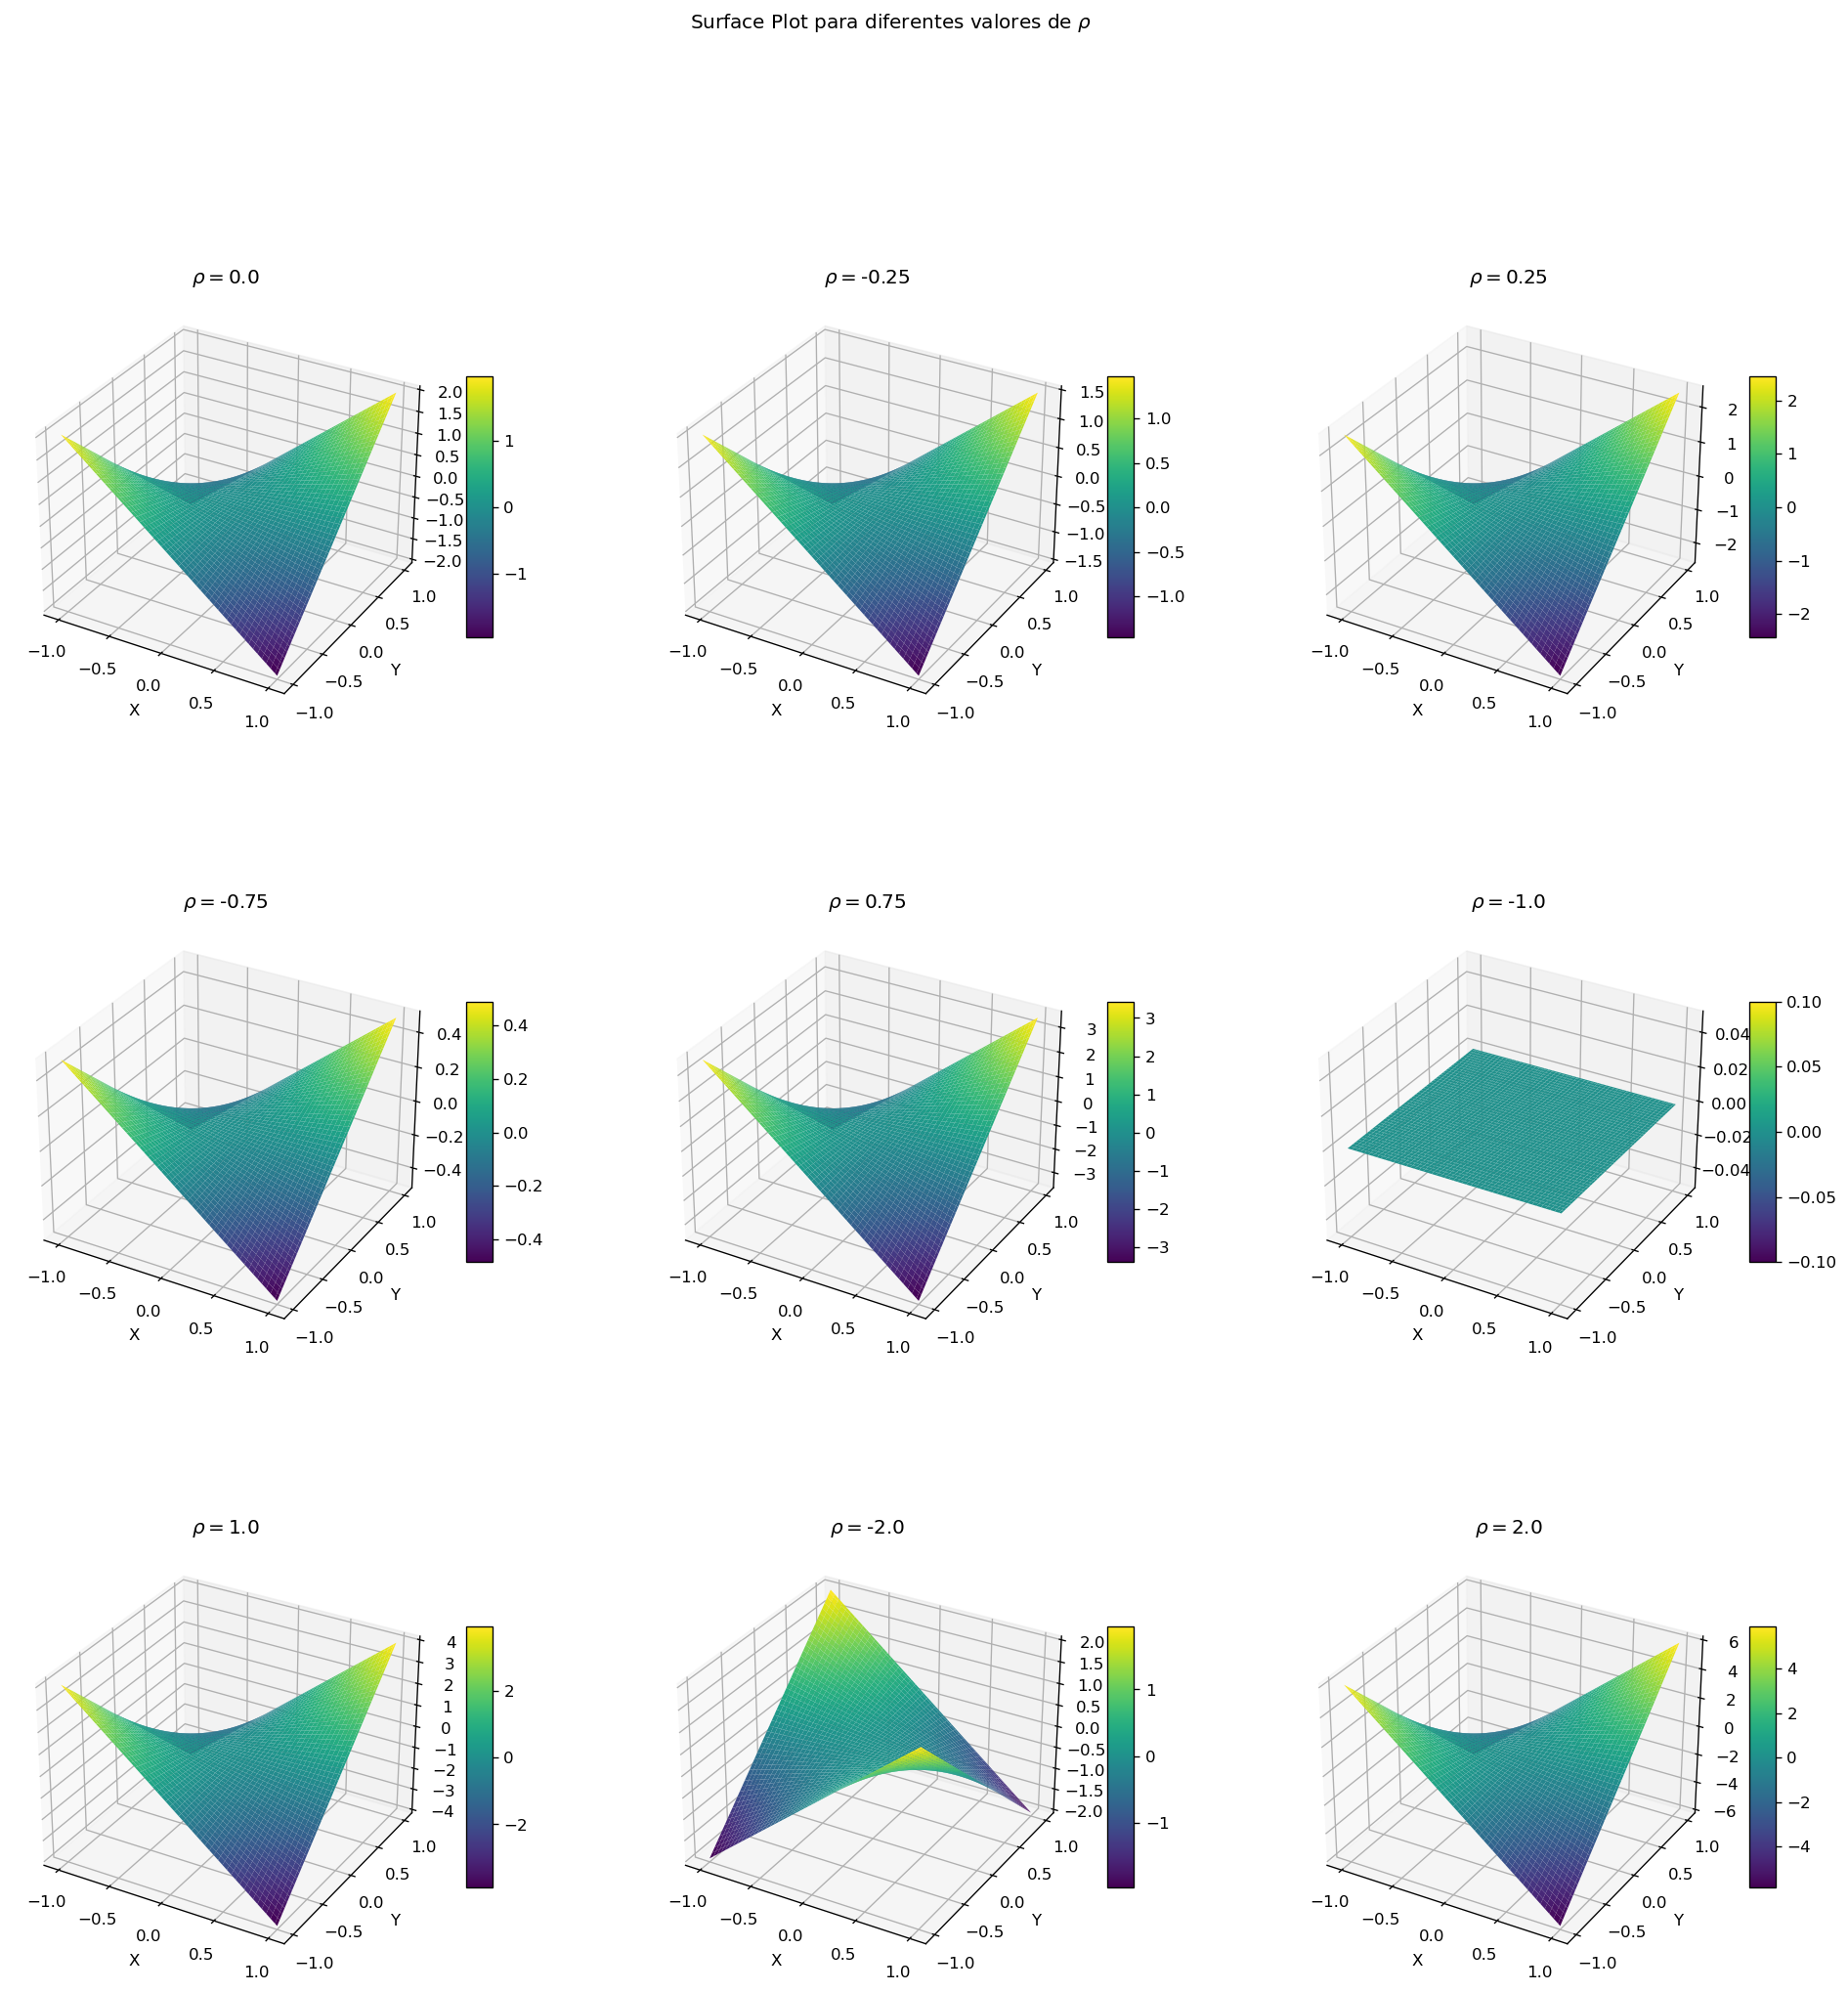

In [5]:
# Vector de valor asociados a Rho
rho = np.array([0, -0.25, 0.25, -0.75, 0.75, -1, 1, -2, 2])

for i in range(len(rho)):
    fig = plt.figure(1, figsize=(20, 20), dpi=120)
    
    if i==0:
        fig.suptitle('Surface Plot para diferentes valores de 'r'$\rho$')
    
    # Se define la Matriz A_Rho
    Ar = np.array([[1, rho[i]], [rho[i], 1]])
    
    # Se establece como proyección 3D
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    
    # Desarrollo de la superficie
    surf = ax.plot_surface(X, Y, cuadratic(X[0:2,:], Ar), cmap='viridis')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    
    # Marcos de refrencia
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(''r'$\rho=$' + str(rho[i]))
    plt.grid(color= 'black', linestyle='-', linewidth=0.5)

b. Uso de la función *countourf* para f en rango $[-1,1]^2$ para cada matriz

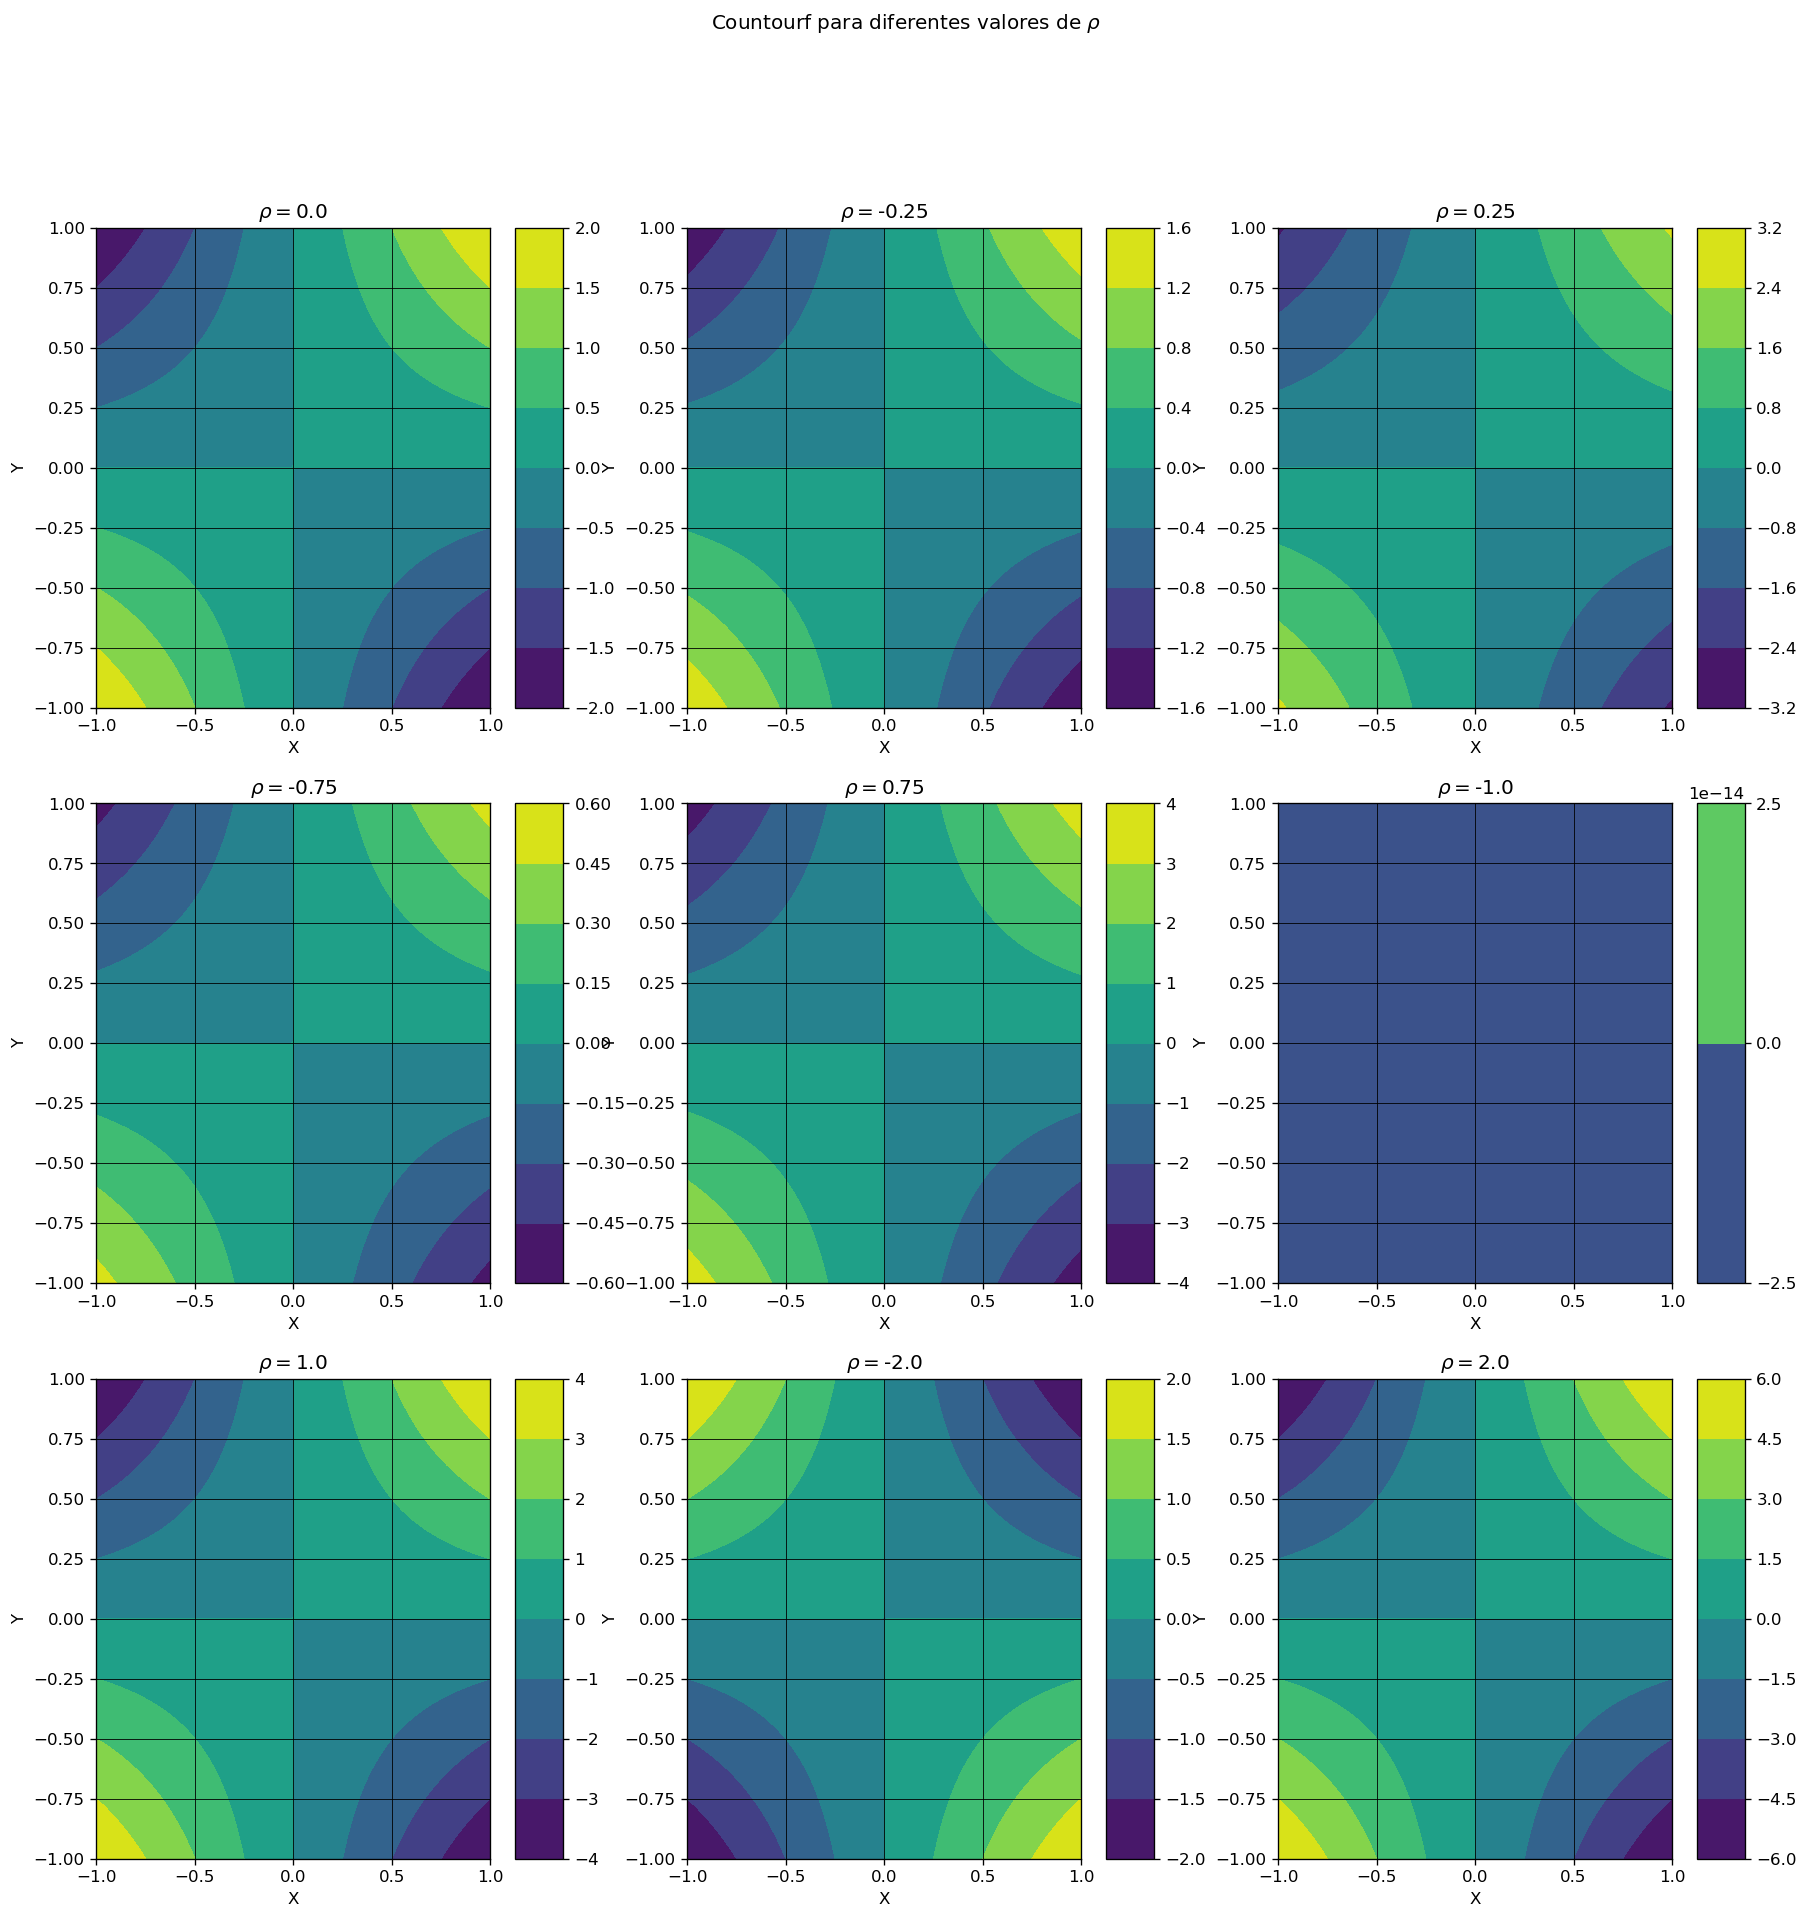

In [6]:
for i in range(len(rho)):
    figure(1, figsize=(18, 18), dpi=120)
    plt.subplot(3,3,i+1)
    plt.suptitle('Countourf para diferentes valores de 'r'$\rho$')
    
    # Se define la Matriz A_Rho
    Ar = np.array([[1, rho[i]], [rho[i], 1]])
    
    # Desarrollo superficie
    ax = plt.contourf(X, Y, cuadratic(X[0:2,:], Ar), cmap='viridis')
    plt.colorbar(ax, shrink=1, aspect=10)
    
    # Marcos de refrencia
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(''r'$\rho=$' + str(rho[i]))
    plt.grid(color= 'black', linestyle='-', linewidth=0.5)

c) Valores y vectores propios para diferentes $\rho$

In [7]:

# Valores y vectores propios
val = []
vec = []

for i in range(len(rho)):
    
    # Se define la Matriz A_Rho
    Ar = np.array([[1, rho[i]], [rho[i], 1]])
    
    # Valores locales
    l_val, l_vec = np.linalg.eig(Ar)
    val.append(np.around(l_val, 2))
    vec.append(np.around(l_vec, 2))

data = {"Magnitud $\rho$": rho,
       "Valores propios": val,
       "Vectores propios": vec}

df = pd.DataFrame(data)
df.head(10)


,Magnitud $\rho$,Valores propios,Vectores propios
0,0.00,"[1.0, 1.0]","[[1.0, 0.0], [0.0, 1.0]]"
1,-0.25,"[1.25, 0.75]","[[0.71, 0.71], [-0.71, 0.71]]"
2,0.25,"[1.25, 0.75]","[[0.71, -0.71], [0.71, 0.71]]"
3,-0.75,"[1.75, 0.25]","[[0.71, 0.71], [-0.71, 0.71]]"
4,0.75,"[1.75, 0.25]","[[0.71, -0.71], [0.71, 0.71]]"
5,-1.00,"[2.0, 0.0]","[[0.71, 0.71], [-0.71, 0.71]]"
6,1.00,"[2.0, 0.0]","[[0.71, -0.71], [0.71, 0.71]]"
7,-2.00,"[3.0, -1.0]","[[0.71, 0.71], [-0.71, 0.71]]"
8,2.00,"[3.0, -1.0]","[[0.71, -0.71], [0.71, 0.71]]"


### Punto 3

Considere las matrices $A_{1}, A_{2}, A_{3}, A_{4}$:

a. Halle los vectores propios normalizados $v_{1}, v_{2}$ de la matriz tal que $||v_{1}||=1$. Posteriormente, grafique en el plano los vectores $\lambda_{i} \cdot v_{i}$. 

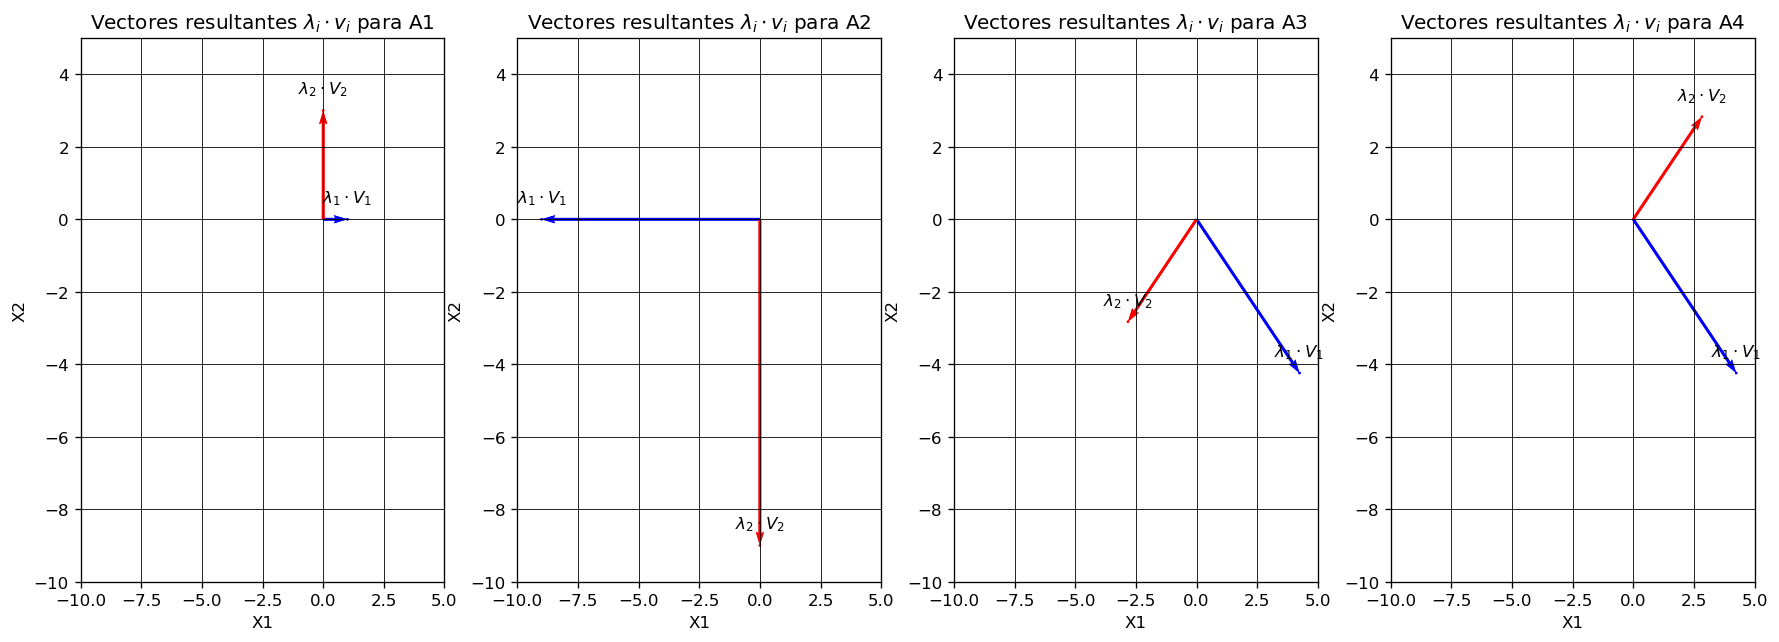

In [58]:
# Origen
O = np.array([[0, 0],[0, 0]])

# Matrices de interés
A1 = np.array([[1, 0], [0, 3]])
A2 = np.array([[-9, 0], [0, -9]])
A3 = np.array([[1, 5], [5, 1]])
A4 = np.array([[5, 1], [1, 5]])
A = np.array([A1, A2, A3, A4])

# Función para normalizar los vectores propios
def norm_vec(A):

    # Se cuantifican los valores  vectores propios
    val, vec = np.linalg.eig(A)
    
    for i in range(len(vec)):
        vec[i] = vec[i]/np.linalg.norm(vec[i])
        
    return val, vec


for i in range(len(A)):
    
    # Cálculo de los valores propios y vector propio normalizado
    val, vec = norm_vec(A[i])
    
    # Vector Lamb*Vec
    V1 = val[0]*vec[0]
    V2 = val[1]*vec[1]
    
    # Gráfica de vectorez
    figure(1, figsize=(18, 6), dpi=120)
    plt.subplot(1, 4, i+1)
    Q1 = plt.quiver(*O, V1[0], V1[1], angles='xy', scale_units='xy', color='blue', scale=1)
    Q2 = plt.quiver(*O, V2[0], V2[1], angles='xy', scale_units='xy', color='red', scale=1)
    
    # Marcos de referencia
    plt.xlim(-10, 5)
    plt.ylim(-10, 5)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.quiverkey(Q1, V1[0], V1[1], 0, '$\lambda_{1} \cdot V_{1}$', coordinates='data')
    plt.quiverkey(Q2, V2[0], V2[1], 0, '$\lambda_{2} \cdot V_{2}$', coordinates='data')
    plt.title('Vectores resultantes $\lambda_{i} \cdot v_{i}$ para A' + str(i+1))
    plt.grid(color="black", linestyle='-', linewidth=0.5)

b. Grafique dos curvas de contorno, de tal manera que estén sobre los vectores dibujados anteriormente.

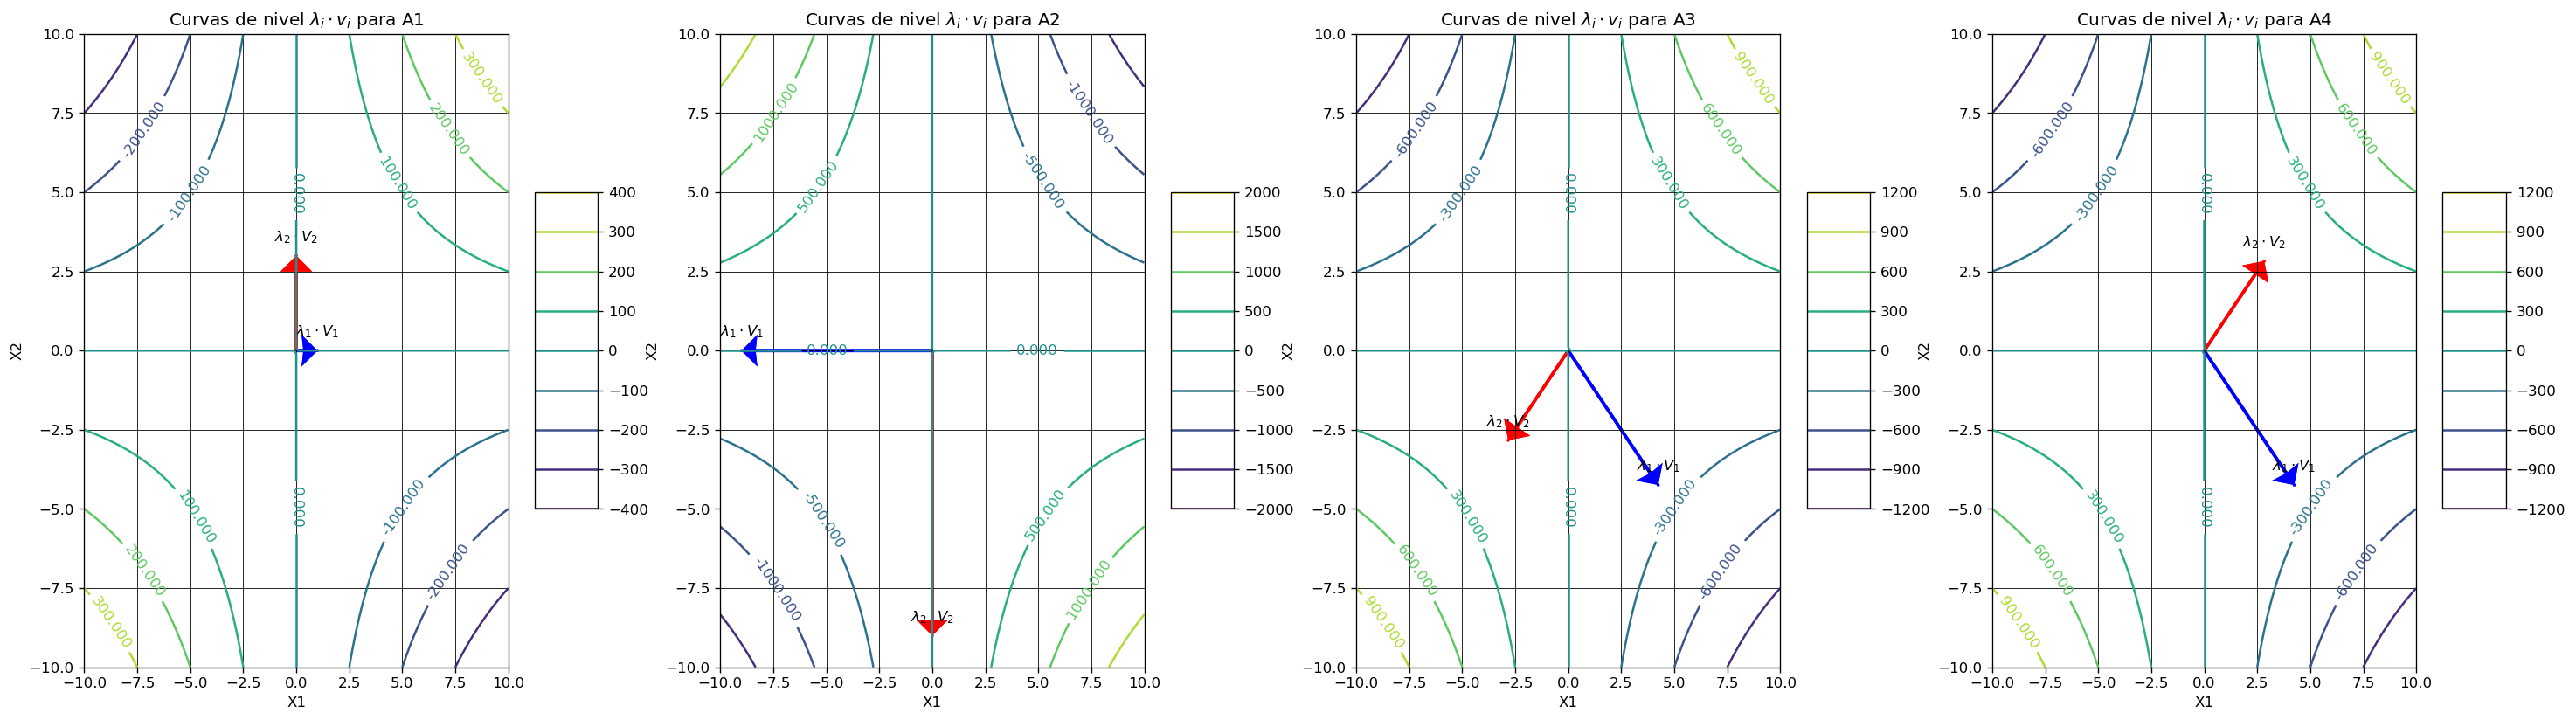

In [91]:
for i in range(len(A)): 
    # Cálculo de los valores propios y vector propio normalizado
    val, vec = norm_vec(A[i])
    
    # Vector Lamb*Vec
    V1 = val[0]*vec[0]
    V2 = val[1]*vec[1]
    
    # Gráfica de vectores
    figure(1, figsize=(30, 8), dpi=120)
    plt.subplot(1, 4, i+1)
    
    # Grafica de curvas de nivel
    xp = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(xp, xp)
    ax = ax = plt.contour(X, Y, cuadratic(X[0:2,:], A[i]))
    plt.colorbar(ax,shrink=0.5,aspect=5)
    
    Q1 = plt.quiver(*O, V1[0], V1[1], angles='xy', scale_units='xy', color='blue', scale=1, headwidth=10)
    Q2 = plt.quiver(*O, V2[0], V2[1], angles='xy', scale_units='xy', color='red', scale=1, headaxislength=5, headwidth=10)
    
    # Marcos de referencia
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.quiverkey(Q1, V1[0], V1[1], 0, '$\lambda_{1} \cdot V_{1}$', coordinates='data')
    plt.quiverkey(Q2, V2[0], V2[1], 0, '$\lambda_{2} \cdot V_{2}$', coordinates='data')
    plt.title('Curvas de nivel $\lambda_{i} \cdot v_{i}$ para A' + str(i+1))
    plt.grid(color="black", linestyle='-', linewidth=0.5)